# 파이썬 기반의 AI를 위한 기초수학, 확률및통계

In [1]:
## 강봉주 
## bonjour.kang@gmail.com
##
## 통계
##

In [2]:
# 필요한 패키지
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

# 필요한 패키지 2
from pandas_datareader import data as pdr
from pandas.plotting import scatter_matrix

# 한글출력
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

mpl.__version__

'3.1.3'

## 막대 도표

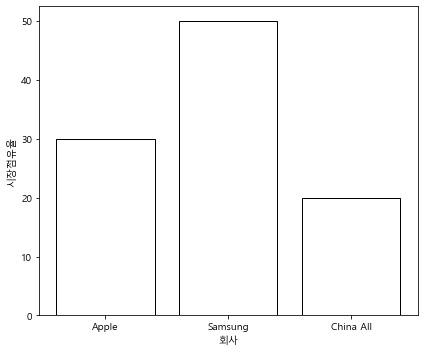

In [3]:
# 단순 막대 도표
names = ['Apple', 'Samsung', 'China All']
bar_height =np.array([30, 50, 20])

fig, ax = plt.subplots(figsize=(6, 5))
ax.bar(names, bar_height, color='white', edgecolor='black')
ax.set_xlabel('회사')
ax.set_ylabel('시장점유율')

plt.tight_layout()

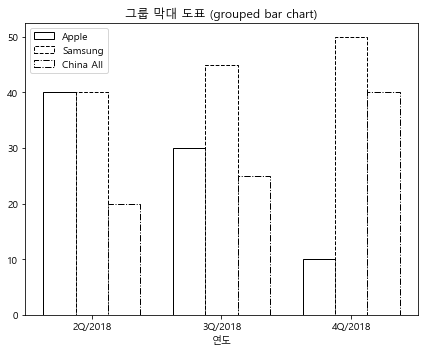

In [4]:
# 그룹 막대 도표 (grouped bar chart)
# 막대 하나의 길이
barWidth = 0.25

# 각 하위 범주의 높이(값): 여기서 각 배열의 첫번째 값은 같은 그룹임
bars1 = np.array([40, 30, 10])
bars2 = np.array([40, 45, 50])
bars3 = np.array([20, 25, 40])
tick_values = ['2Q/2018', '3Q/2018', '4Q/2018']

# 막대 도표의 위치
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

fig, ax = plt.subplots(figsize=(6, 5))

# 막대 도표 생성
ax.bar(r1, bars1, color='white', width=barWidth, edgecolor='black', linestyle='-', label='Apple')
ax.bar(r2, bars2, color='white', width=barWidth, edgecolor='black', linestyle='--', label='Samsung')
ax.bar(r3, bars3, color='white', width=barWidth, edgecolor='black', linestyle='-.', label='China All')

# 눈금(tick) 구성하고 값 주기
ax.set_xlabel('연도')
ax.set_xticks([r + barWidth for r in np.arange(len(bars1))])
ax.set_xticklabels(tick_values)
ax.set_title('그룹 막대 도표 (grouped bar chart)')
ax.legend()

plt.tight_layout()

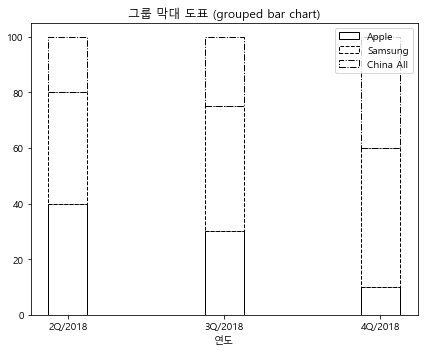

In [5]:
# 적층 막대 도표 (stacked bar chart)
fig, ax = plt.subplots(figsize=(6, 5))

# 막대 도표 생성
ax.bar(r1, bars1, color='white', width=barWidth, edgecolor='black', linestyle='-',  label='Apple')
ax.bar(r1, bars2, color='white', width=barWidth, bottom=bars1, edgecolor='black', linestyle='--', label='Samsung')
ax.bar(r1, bars3, color='white', width=barWidth, bottom=bars1+bars2, edgecolor='black', linestyle='-.', label='China All')

# 눈금(tick) 구성하고 값 주기
ax.set_xlabel('연도')
ax.set_xticks(r1)
ax.set_xticklabels(tick_values)
ax.set_title('그룹 막대 도표 (grouped bar chart)')
ax.legend(loc='best')

plt.tight_layout()

## 원 도표

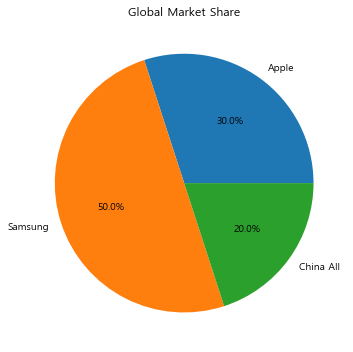

In [6]:
# 단순 원 도표
labels = ['Apple', 'Samsung', 'China All']
sizes = np.array([30, 50, 20])

fig, ax = plt.subplots(figsize=(6, 5))

# 앞의 %는 포맷을 표시하기 위한 것이며 뒤의 %%는 % 표시하기 위하여 %%가 된 것임
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
ax.set_title('Global Market Share')

plt.tight_layout()

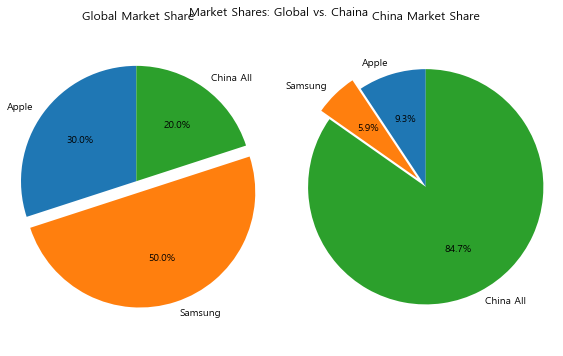

In [7]:
# 그룹 원 도표
labels = ['Apple', 'Samsung', 'China All']
sizes = np.array([30, 50, 20])
sizes_in_china = np.array([11, 7, 100])
explode = (0, 0.1, 0)

fig, ax = plt.subplots(figsize=(8, 5), ncols=2)
ax[0].pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=90)
ax[0].axis('equal')
ax[0].set_title('Global Market Share')

ax[1].pie(sizes_in_china, explode=explode, labels=labels, autopct='%1.1f%%', startangle=90)
ax[1].axis('equal')
ax[1].set_title('China Market Share')
plt.suptitle('Market Shares: Global vs. Chaina')
plt.tight_layout()

## 선 도표

In [8]:
# 단순 선도표

# 데이터 구성
# 데이터 시작일 지정
start_date = "2017-01-01"

# 주가 기호 지정
ss = '005930.KS'
lgchem = '051910.KS'

# 데이터 구성
df = pdr.get_data_yahoo(ss, start=start_date)
df.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


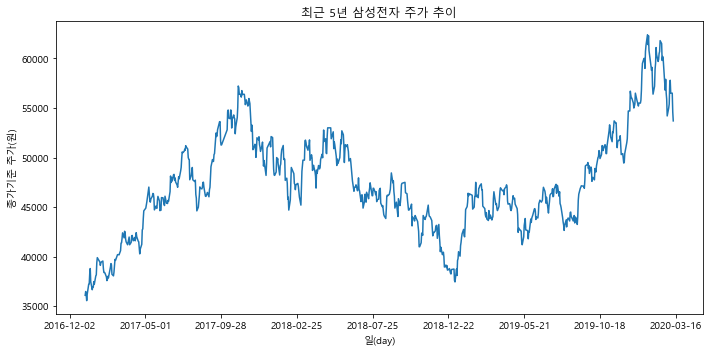

In [9]:
# 단순 선도표
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df.index, df['Close'])

ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(10))
ax.set_xlabel('일(day)')
ax.set_ylabel('종가기준 주가(원)')
ax.set_title('최근 5년 삼성전자 주가 추이')

plt.tight_layout()

In [10]:
# 비교 선도표
# twinx() 함수를 이용한 눈금이 틀린 2개의 추세를 동시에 보여주기

# 데이터 구성
start_date = '2014-01-01'
end_date = '2018-12-31'

df = pdr.get_data_yahoo(ss, start=start_date, end=end_date)
df2 = pdr.get_data_yahoo(lgchem, start=start_date, end=end_date)
x = df.index
y1 = df.Close
y2 = df2.Close

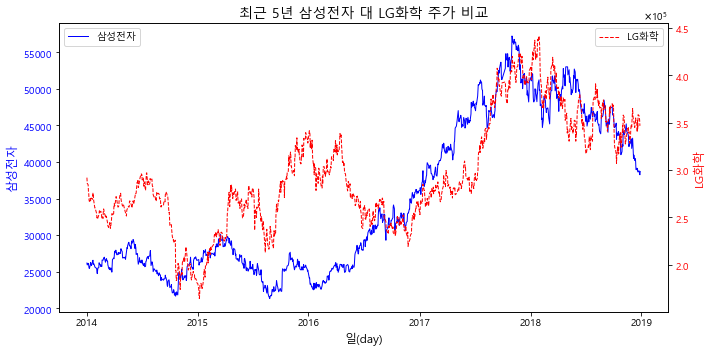

In [11]:
# 이중 축 선도표 (twin axes line chart)
fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.set_title("최근 5년 삼성전자 대 LG화학 주가 비교", fontsize=14)
ax1.set_xlabel("일(day)", fontsize=12)

ax1.plot(x, y1, ls='-', lw=1, color="blue", label='삼성전자')
ax1.set_ylabel("삼성전자", fontsize=12, color="blue")
for label in ax1.get_yticklabels():
    label.set_color("blue")

formatter = mpl.ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((-1,1))
ax1.yaxis.set_major_formatter(formatter)

ax2 = ax1.twinx()
ax2.plot(x, y2, ls='--', lw=1, color="red", label='LG화학')
ax2.set_ylabel("LG화학", fontsize=12, color="red")
for label in ax2.get_yticklabels():
    label.set_color("red")

ax2.yaxis.set_major_formatter(formatter)
ax1.legend(loc='upper left')
ax2.legend()

plt.tight_layout()

## 히스토그램

In [12]:
# 단순 히스토그램

# 데이터 구성
# 데이터 시작일 지정
start_date = "2015-01-01"

# 주가 기호 지정
ss = '005930.KS'
lgchem = '051910.KS'

# 데이터 구성
df = pdr.get_data_yahoo(ss, start=start_date)
df.columns
df.shape

(1269, 6)

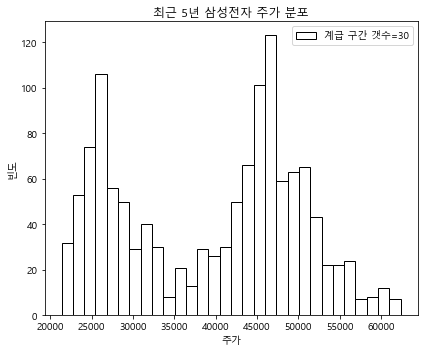

In [13]:
fig, ax = plt.subplots(figsize=(6, 5))
ax.hist(df['Close'], bins=30, color='white', edgecolor='black', label='계급 구간 갯수=30')

ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(10))
ax.set_xlabel('주가')
ax.set_ylabel('빈도')
ax.set_title('최근 5년 삼성전자 주가 분포')
ax.legend()

plt.tight_layout()

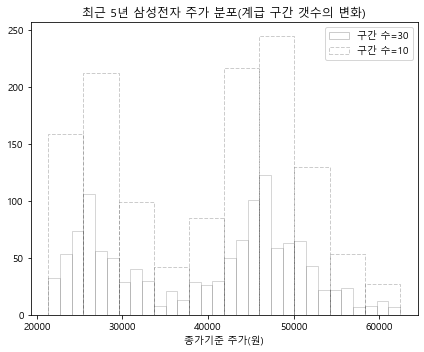

In [14]:
# 그룹 히스토그램
fig, ax = plt.subplots(figsize=(6, 5))

# 투명도는 alpha로 표현: 0과 1사이 값. 작을수록 투명
ax.hist(df['Close'], bins=30, color='white', edgecolor='black', label='구간 수=30', ls='-', alpha=0.2)
ax.hist(df['Close'], bins=10, color='white',edgecolor='black', label='구간 수=10', ls='--', alpha=0.2)

ax.set_xlabel('종가기준 주가(원)')
ax.set_title('최근 5년 삼성전자 주가 분포(계급 구간 갯수의 변화)')
ax.legend()

plt.tight_layout()

## 상자그림

In [15]:
# 데이터 구성
# [HFWS] 데이터: “가계금융복지조사( 2017년 이후) > 가구마스터(제공)[2018가구금융복지조사]”
url = 'https://github.com/bong-ju-kang/kmu-mba-statistics-winter/raw/master/data/MDIS_2018_HFWS.zip'
df = pd.read_csv(url, header=None)
df.shape

(18640, 161)

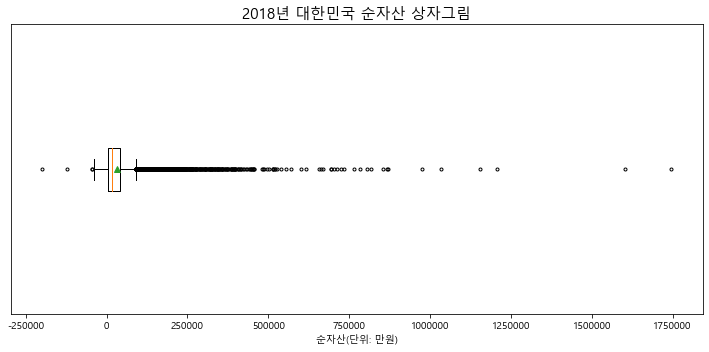

In [16]:
# 단순 상자그림

# 가구당 순자산액: 109번째
pure_asset = df[108]

fig, ax = plt.subplots(figsize=(10, 5))
ax.boxplot(pure_asset, vert=False, sym='.', showmeans=True)

ax.set_xlabel('순자산(단위: 만원)')
ax.set_yticks([])
ax.set_title('2018년 대한민국 순자산 상자그림', fontsize=15)

plt.tight_layout()

In [17]:
# 비교 상자 그림
# 범주 변수 값별 상자 그림

# 데이터 구성
# 가구주 연령: 10세 계층별, 21번째 데이터
age_group = np.sort(df[21].unique())
age_group

array(['G01', 'G02', 'G03', 'G04', 'G05'], dtype=object)

In [18]:
age_group_label = [ str(c) + '대' for c in np.arange(10, 60, 10)]

# 연령대 별 순자산 데이터 구성
box_data = [df[df[21]==group].loc[:, 108] for group in age_group]

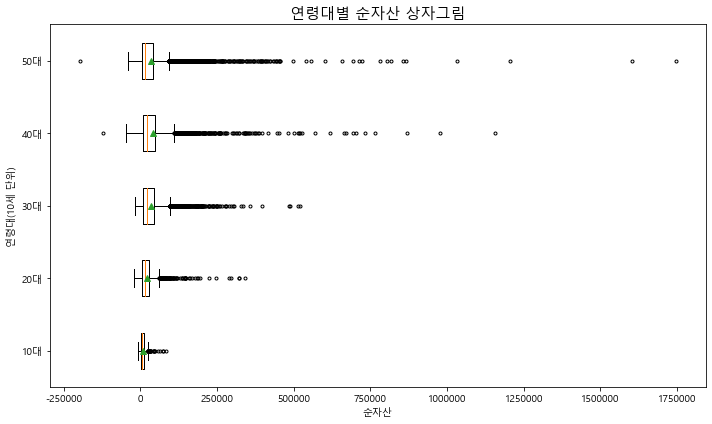

In [19]:
# 상자 그림 구성
fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(box_data, vert=False, sym='.', showmeans=True)
ax.set_yticklabels(age_group_label)

ax.set_ylabel ('연령대(10세 단위)')
ax.set_xlabel ('순자산')

ax.set_title('연령대별 순자산 상자그림', fontsize=15)

plt.tight_layout()

## 산점도 (scatterplot)

In [20]:
# 단순 산점도

# 데이터 구성
df = pd.read_table('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data',
                   header=None, delimiter=r'\s+')
df.columns = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat', 'medv']
df.shape

(506, 14)

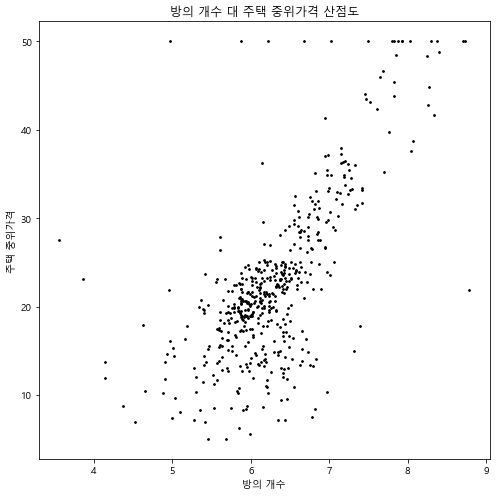

In [21]:
fig, ax = plt.subplots(figsize=(7, 7))
ax.scatter(df.rm, df.medv, c='black', s=3)

ax.set_xlabel('방의 개수')
ax.set_ylabel('주택 중위가격')
ax.set_title('방의 개수 대 주택 중위가격 산점도', fontsize=12)

plt.tight_layout()

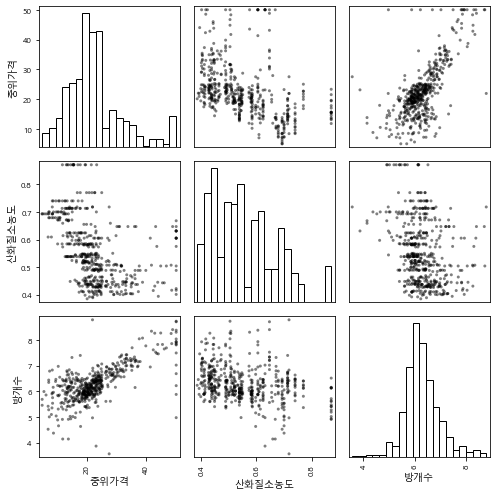

In [22]:
# 산점도 행렬
scatter_matrix(df[['medv', 'nox', 'rm']].rename(columns={'medv':'중위가격', 'nox':'산화질소농도', 'rm':'방개수'}),
                  figsize=(7, 7), color='black', hist_kwds = {'bins':20, 'facecolor':'white', 'edgecolor':'black'})

plt.tight_layout()

## 등고선도

In [23]:
# 데이터 구성
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)

# x의 각 값(하나의 열로 구성)별로 y의 모든 값을 생성
X, Y = np.meshgrid(x, y)
X.shape

(100, 100)

In [24]:
def ellipse(x, y):
    return (2*x**2 + 3*y**2)

Z = ellipse(X, Y)

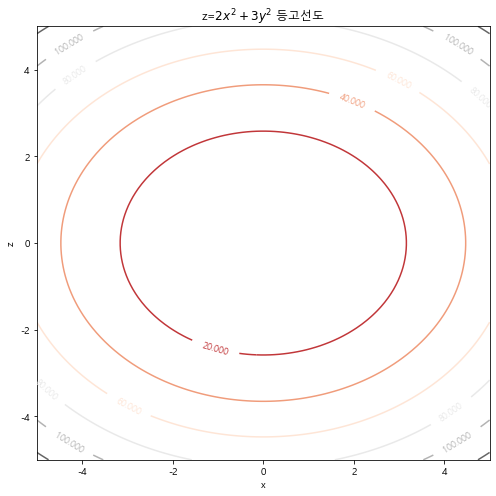

In [25]:
# 단순 등고선도
fig, ax = plt.subplots(figsize=(7, 7))
cntr  = ax.contour(X, Y, 2*X**2 + 3*Y**2, cmap='RdGy')
ax.clabel(cntr, inline=True, fontsize=9)

ax.set_xlabel('x')
ax.set_ylabel('z')
ax.set_title(r'z=$2x^2+3y^2$ 등고선도')

plt.tight_layout()

## 데이터 목록

### [BANK] 데이터

In [26]:
# 경로 정의
url = 'https://github.com/bong-ju-kang/kmu-mba-statistics-winter/raw/master/data/bank.zip'

# 데이터 읽기
df = pd.read_csv(url)
df.shape

(4521, 17)

###  [HOUSING] 데이터

In [27]:
# 경로 정의
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"
df = pd.read_csv(url,sep='\s+',  header=None)

# 컬럼 정보 주기
df.columns = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age',
              'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat', 'medv']

# 데이터 확인
df.shape## [HFWS] 데이터

(506, 14)

### [HFWS] 데이터

In [28]:
# 경로 정의
url = 'https://github.com/bong-ju-kang/kmu-mba-statistics/raw/master/Data/MDIS_2018_HFWS.txt'

# 데이터 읽기
df = pd.read_csv(url, header=None)

# 데이터 확인
df.shape

(18640, 161)